In [62]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

mola_fp = 'data/Mars_HRSC_MOLA_BlendDEM_Global_200mp_v2.tif'

In [63]:
mola = gdal.Open(mola_fp, gdal.GA_ReadOnly)
mola_geotransform = mola.GetGeoTransform()
mola_proj = mola.GetProjection()
mola_proj

'GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU_IAG",3396190,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'

In [64]:
mola_geotransform

(-180.0, 0.003374120830641, 0.0, 90.0, 0.0, -0.003374120830641)

In [76]:
# input longitude and latitude, output mola_data
lon = [-2, 2]
lat = [-2, 2]
# lon由小到大，lat由大到小，排序
lon.sort()
lat.sort(reverse=True)
# 根据lon和lat计算出对应的像素坐标
px = (np.array(lon) - mola_geotransform[0]) / mola_geotransform[1]
py = (np.array(lat) - mola_geotransform[3]) / mola_geotransform[5]
print(px, py)

[52754.483 53939.977] [26080.868 27266.362]


In [77]:
px = np.round(px).astype(int)
py = np.round(py).astype(int)
print(px, py)

[52754 53940] [26081 27266]


In [78]:
# 读取数据
xoff = int(px[0])
yoff = int(py[0])
xsize = int(px[1] - px[0])
ysize = int(py[1] - py[0])
type(ysize)

int

In [79]:
mola_data = mola.ReadAsArray(xoff=xoff, yoff=yoff, xsize=xsize, ysize=ysize)
mola_data.shape

(1185, 1186)

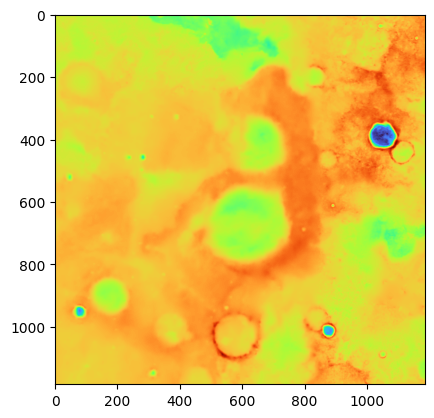

In [80]:
plt.imshow(mola_data,cmap = 'turbo')

In [81]:
# 设置缩放倍数，例如，10x10的数据需要stride为10
stride = 10
xscale = int(xsize / stride)
yscale = int(ysize / stride)
# 读取数据
data = mola.ReadAsArray(xoff, yoff, xsize, ysize, buf_xsize=xscale, buf_ysize=yscale, buf_type=None, resample_alg=gdal.GRIORA_NearestNeighbour, callback=None, callback_data=None)
data.shape

(118, 118)

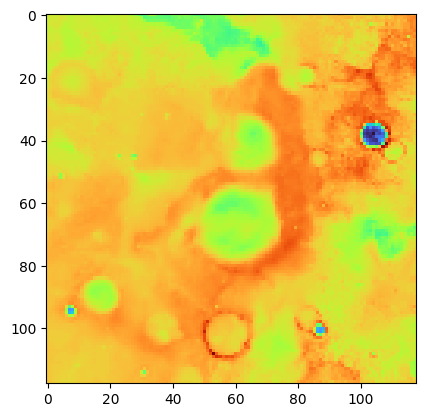

In [82]:
plt.imshow(data,cmap = 'turbo')

In [83]:
points = np.array([[0, 0], [0, -1], [-1, 0], [1.5, 1.5]]) 
points[:,0]


array([ 0. ,  0. , -1. ,  1.5])

In [91]:
points_x = np.int32((points[:,0] - lon[0]) / mola_geotransform[1])
points_x

array([ 592,  592,  296, 1037])

In [92]:
points_y = np.int32((points[:,1] - lat[0]) / mola_geotransform[5])
points_y

array([592, 889, 592, 148])

In [93]:
scale_points_x = np.int32(points_x / stride)
scale_points_y = np.int32(points_y / stride)

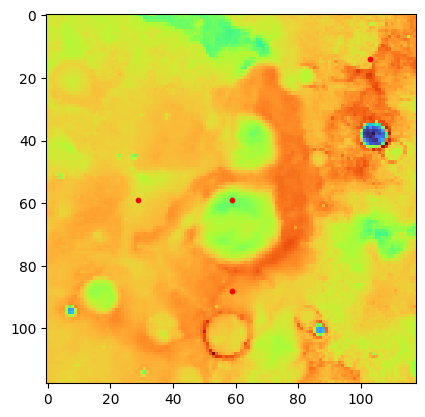

In [94]:
plt.imshow(data,cmap = 'turbo')
plt.scatter(scale_points_x, scale_points_y, c='r', s=10)
plt.show()

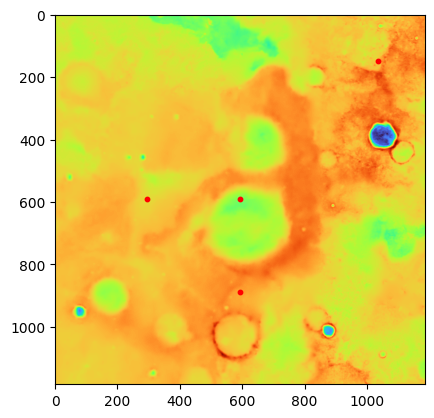

In [97]:
plt.imshow(mola_data,cmap = 'turbo')
plt.scatter(points_x, points_y, c='r', s=10)
plt.show()

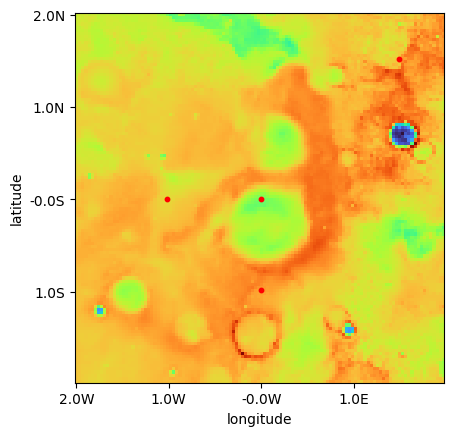

In [104]:
# 处理坐标问题
# 横坐标为经度，纵坐标为纬度,范围存储在lon和lat中,均匀设置五个刻度
plt.xlabel('longitude')
plt.ylabel('latitude')
# ticks和实际维度不对应，需要设置，如果纬度大于0后面加N，小于0后面加S，经度大于0后面加E，小于0后面加W
plt.xticks(np.linspace(0, xscale, 5), ['{}E'.format(i) if i > 0 else '{}W'.format(-i) for i in np.linspace(lon[0], lon[1], 5)])
plt.yticks(np.linspace(0, yscale, 5), ['{}N'.format(i) if i > 0 else '{}S'.format(-i) for i in np.linspace(lat[0], lat[1], 5)])
plt.imshow(data,cmap = 'turbo')
plt.scatter(scale_points_x, scale_points_y, c='r', s=10)

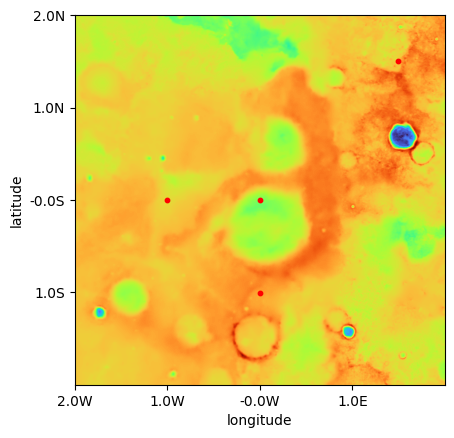

In [105]:
# 处理坐标问题
# 横坐标为经度，纵坐标为纬度,范围存储在lon和lat中,均匀设置五个刻度
plt.xlabel('longitude')
plt.ylabel('latitude')
# ticks和实际维度不对应，需要设置，如果纬度大于0后面加N，小于0后面加S，经度大于0后面加E，小于0后面加W
plt.xticks(np.linspace(0, xsize, 5), ['{}E'.format(i) if i > 0 else '{}W'.format(-i) for i in np.linspace(lon[0], lon[1], 5)])
plt.yticks(np.linspace(0, ysize, 5), ['{}N'.format(i) if i > 0 else '{}S'.format(-i) for i in np.linspace(lat[0], lat[1], 5)])
plt.imshow(mola_data,cmap = 'turbo')
plt.scatter(points_x, points_y, c='r', s=10)

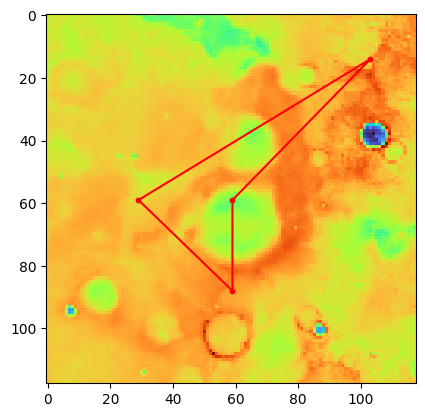

In [107]:
# 在地图上画多边形，顶点坐标为points，从第一个点开始，依次连接
plt.imshow(data,cmap = 'turbo')
plt.scatter(scale_points_x, scale_points_y, c='r', s=10)
s_scale_points_x = np.append(scale_points_x, scale_points_x[0])
s_scale_points_y = np.append(scale_points_y, scale_points_y[0])
plt.plot(s_scale_points_x, s_scale_points_y, c='r')
plt.show()